In [176]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
# get encoded data
data_df = pd.read_csv('encoded_data.csv')
data_df

,RunFootage,LengthOffset,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,...,Operator_2167,Operator_2178,Operator_2198,Operator_2201,Operator_2218,Operator_2223,Operator_2238,Operator_2262,Operator_2275,Operator_2469
0,1250,500,178.0,188.1,189.9,189.9,185.0,188.5,195.6,195.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1250,250,177.9,188.2,190.1,190.0,183.2,188.6,195.5,194.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1250,500,177.7,188.0,190.0,190.0,184.0,184.3,195.3,195.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1250,250,178.2,188.2,190.0,190.1,184.4,184.4,195.2,195.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1250,500,178.0,188.3,190.1,190.0,182.8,183.7,195.2,194.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,16000,1000,179.3,224.8,220.1,210.8,202.5,200.2,206.5,205.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2573,16000,250,181.0,224.9,220.1,208.8,202.2,204.5,207.0,205.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2574,16000,250,182.3,224.7,219.4,208.7,201.8,203.5,204.3,205.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2575,16000,250,180.3,238.6,234.0,234.5,221.6,229.3,225.8,220.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
# select only y values

result_cols = ['amb_elongation_result','amb_tensile_result','hot_tensile_result','hot_elongation_result','overall_result']

X = data_df.drop(columns=result_cols)
y = data_df['overall_result']

In [150]:
# scale data
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[0.01893341, 0.09090909, 0.74835742, ..., 0.        , 0.        ,
        0.        ],
       [0.01893341, 0.        , 0.74770039, ..., 0.        , 0.        ,
        0.        ],
       [0.01893341, 0.09090909, 0.74638633, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.24954269, 0.        , 0.77660972, ..., 0.        , 0.        ,
        0.        ],
       [0.24954269, 0.        , 0.76346912, ..., 0.        , 0.        ,
        0.        ],
       [0.24954269, 0.        , 0.76806833, ..., 0.        , 0.        ,
        0.        ]])

In [151]:
# Split the data by using train_test_split()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=69)

In [101]:
# Create a logistic regression model, train, and validate the model.
classifier = LogisticRegression(max_iter=100000)
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8203933747412008
Testing Data Score: 0.8077519379844961


In [102]:
y_true = y_test
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[241  50]
 [ 74 280]]


In [103]:
tn, fp, fn, tp = cm.ravel()

In [104]:
precision = tp / (tp + fp)
precision

0.8484848484848485

In [105]:
sensitivity = tp / (tp + fn)
sensitivity

0.7909604519774012

In [106]:
f1 = 2*precision*sensitivity / (precision + sensitivity)

In [107]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       291
           1       0.85      0.79      0.82       354

    accuracy                           0.81       645
   macro avg       0.81      0.81      0.81       645
weighted avg       0.81      0.81      0.81       645



In [120]:
# evaluate features

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(X_scaled,y)

dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(data_df.drop(columns=result_cols).columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(25,'Score'))  #print 10 best features

                      Specs      Score
34     amb_tensile_pre_cure  81.340717
33                thickness  65.692007
0                RunFootage  35.860954
31          TotalRunFootage  32.954310
51            Operator_1766  32.186468
35  amb_elongation_pre_cure  18.129131
36                    month  15.148493
52            Operator_1791  10.479860
1              LengthOffset   9.696778
42                Machine_2   8.846976
19                      Z18   8.659707
18                      Z17   8.540075
57            Operator_2198   7.800733
26         Screw_Speed_Real   7.189835
41                Machine_1   6.811442
60            Operator_2223   6.406709
49            Operator_1580   5.992465
38              ten_day_max   5.881131
55            Operator_2167   5.842269
24            CS_Speed_Real   4.306557
25           Nip_Speed_Real   4.261549
8                        Z7   3.718999
21             CST_TOP_Real   3.692811
20                      Z19   3.181531
11                      Z

In [126]:
# update to fewer x cols -- only top 5

X = data_df[['amb_tensile_pre_cure','thickness','RunFootage','amb_elongation_pre_cure','month']]

# scale data
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

# Split the data by using train_test_split()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=69)

# Create a logistic regression model, train, and validate the model.
classifier = LogisticRegression(max_iter=100000)
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7598343685300207
Testing Data Score: 0.7596899224806202


In [129]:
# evaluate features

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')

fit = bestfeatures.fit(X_scaled,y)

dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(25,'Score'))  #print 10 best features

                     Specs      Score
0     amb_tensile_pre_cure  81.340717
1                thickness  65.692007
2               RunFootage  35.860954
3  amb_elongation_pre_cure  18.129131
4                    month  15.148493


In [185]:
# update to fewer x cols -- only top 10

X = data_df[['Machine_1',
             'Machine_2',
             'RunFootage',
             'LengthOffset',
             'Z1',
             'Z2',
             'Z3',
             'Z4',
             'Z5',
             'Z6',
             'Z7',
             'Z8',
             'Z9',
             'Z10',
             'Z11',
             'Z12',
             'Z13',
             'Z14',
             'Z15',
             'Z16',
             'Z17',
             'Z18',
             'Z19',
             'CST_TOP_Real',
             'CST_Centre_Real',
             'CST_Bottom_Real',
             'CS_Speed_Real',
             'Nip_Speed_Real',
             'Screw_Speed_Real',
             'Back_Pressure_Real',
             'Melt_Temp_Real',
             'Chiller_Temp_Real',
             'Motor_Amps_Real',
             'TotalRunFootage',
             'width']]

# scale data
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

# Split the data by using train_test_split()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=69)

# Create a logistic regression model, train, and validate the model.
classifier = LogisticRegression(max_iter=100000)
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7308488612836439
Testing Data Score: 0.7255813953488373


In [186]:
# evaluate features

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')

fit = bestfeatures.fit(X_scaled,y)

dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(35,'Score'))  #print 10 best features

                 Specs      Score
2           RunFootage  35.860954
33     TotalRunFootage  32.954310
3         LengthOffset   9.696778
1            Machine_2   8.846976
21                 Z18   8.659707
20                 Z17   8.540075
28    Screw_Speed_Real   7.189835
0            Machine_1   6.811442
26       CS_Speed_Real   4.306557
27      Nip_Speed_Real   4.261549
10                  Z7   3.718999
23        CST_TOP_Real   3.692811
22                 Z19   3.181531
13                 Z10   2.510566
12                  Z9   1.808908
14                 Z11   1.474282
7                   Z4   1.198483
34               width   1.082421
11                  Z8   1.060770
9                   Z6   0.788560
17                 Z14   0.682000
31   Chiller_Temp_Real   0.664453
6                   Z3   0.454864
29  Back_Pressure_Real   0.426194
25     CST_Bottom_Real   0.311575
8                   Z5   0.311062
32     Motor_Amps_Real   0.298013
30      Melt_Temp_Real   0.280142
5             

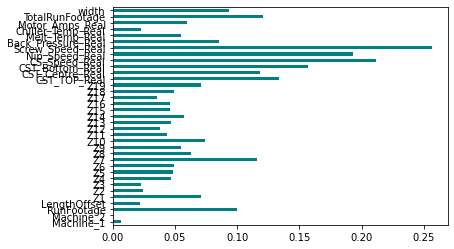

In [141]:
# try mutual info classification
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feat_importances.plot(kind='barh',color='teal')
plt.show()

In [180]:
# update to fewer x cols -- only weather data

X = data_df[['month',
            'ten_day_mean',
            'ten_day_max',
            'ten_day_min',
            'ten_day_swing']]

# scale data
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

# Split the data by using train_test_split()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=69)

# Create a logistic regression model, train, and validate the model.
classifier = LogisticRegression(max_iter=100000)
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.615424430641822
Testing Data Score: 0.6124031007751938


In [155]:
# evaluate features

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')

fit = bestfeatures.fit(X_scaled,y)

dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(25,'Score'))  #print 10 best features

           Specs      Score
0          month  15.148493
2    ten_day_max   5.881131
1   ten_day_mean   2.353213
3    ten_day_min   1.314554
4  ten_day_swing   0.561794


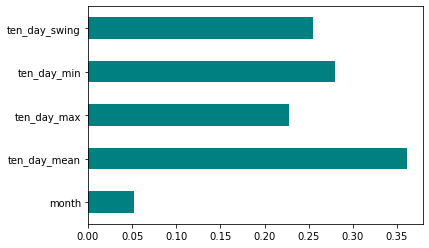

In [139]:
# try mutual info classification
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feat_importances.plot(kind='barh',color='teal')
plt.show()

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=30,
                                            learning_rate=learning_rate,
                                            max_features=10,
                                            max_depth=5,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.901
Accuracy score (validation): 0.854

Learning rate:  0.1
Accuracy score (training): 0.915
Accuracy score (validation): 0.848

Learning rate:  0.25
Accuracy score (training): 0.952
Accuracy score (validation): 0.843

Learning rate:  0.5
Accuracy score (training): 0.970
Accuracy score (validation): 0.837

Learning rate:  0.75
Accuracy score (training): 0.977
Accuracy score (validation): 0.840

Learning rate:  1
Accuracy score (training): 0.977
Accuracy score (validation): 0.809



In [173]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.5,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train, y_train)

# Make Prediction
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(20)

,Prediction,Actual
2150,1,1
1138,1,1
1679,1,1
1240,1,1
1463,1,1
1894,1,1
929,0,0
338,1,1
1755,1,0
1921,0,0


In [174]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       291
           1       0.87      0.84      0.85       354

    accuracy                           0.84       645
   macro avg       0.84      0.84      0.84       645
weighted avg       0.84      0.84      0.84       645



In [188]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.977743271221532
Testing Score: 0.8604651162790697


[0.00083244 0.00055518 0.01208492 0.00311437 0.02392874 0.0182601
 0.01984769 0.02041463 0.02444913 0.02427552 0.04257433 0.01587975
 0.01532267 0.02764043 0.02061865 0.02628685 0.02888391 0.02750907
 0.02628877 0.02465282 0.01938648 0.01334511 0.02765854 0.04377775
 0.06608015 0.0537853  0.0708198  0.06545152 0.06609734 0.03167013
 0.03311676 0.033106   0.03636074 0.0183305  0.0175939 ]


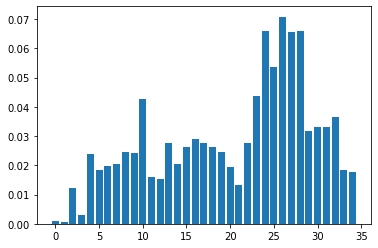

In [189]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()